## Домашнее задание №9
### Генерация поэзии с помощью нейронных сетей: шаг 1
##### Автор: [Радослав Нейчев](https://www.linkedin.com/in/radoslav-neychev/), @neychev

Ваша основная задача: научиться генерироват стихи с помощью простой рекуррентной нейронной сети (Vanilla RNN). В качестве корпуса текстов для обучения будет выступать роман в стихах "Евгений Онегин" Александра Сергеевича Пушкина.

In [1]:
# do not change the code in the block below
# __________start of block__________
import string
import os
from random import sample

import numpy as np
import torch, torch.nn as nn
import torch.nn.functional as F

from IPython.display import clear_output

import matplotlib.pyplot as plt
%matplotlib inline
# __________end of block__________

In [2]:
# do not change the code in the block below
# __________start of block__________
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("{} device is available".format(device))
# __________end of block__________

cpu device is available


#### 1. Загрузка данных.

In [3]:
# do not change the code in the block below
# __________start of block__________
!wget https://raw.githubusercontent.com/neychev/small_DL_repo/master/datasets/onegin.txt

with open('onegin.txt', 'r') as iofile:
    text = iofile.readlines()

text = "".join([x.replace('\t\t', '').lower() for x in text])
# __________end of block__________

--2024-06-03 11:37:34--  https://raw.githubusercontent.com/neychev/small_DL_repo/master/datasets/onegin.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 262521 (256K) [text/plain]
Saving to: ‘onegin.txt.1’

onegin.txt.1        100%[===================>] 256.37K  --.-KB/s    in 0.09s   

2024-06-03 11:37:34 (2.80 MB/s) - ‘onegin.txt.1’ saved [262521/262521]



#### 2. Построение словаря и предобработка текста
В данном задании требуется построить языковую модель на уровне символов. Приведем весь текст к нижнему регистру и построим словарь из всех символов в доступном корпусе текстов. Также добавим токен `<sos>`.

In [4]:
# do not change the code in the block below
# __________start of block__________
tokens = sorted(set(text.lower())) + ["<sos>"]
num_tokens = len(tokens)

assert num_tokens == 84, "Check the tokenization process"

token_to_idx = {x: idx for idx, x in enumerate(tokens)}
idx_to_token = {idx: x for idx, x in enumerate(tokens)}

assert len(tokens) == len(token_to_idx), "Mapping should be unique"

print("Seems fine!")


text_encoded = [token_to_idx[x] for x in text]
# __________end of block__________

Seems fine!


__Ваша задача__: обучить классическую рекуррентную нейронную сеть (Vanilla RNN) предсказывать следующий символ на полученном корпусе текстов и сгенерировать последовательность длины 100 для фиксированной начальной фразы.

Вы можете воспользоваться кодом с занятие №6 или же обратиться к следующим ссылкам:
* Замечательная статья за авторством Andrej Karpathy об использовании RNN: [link](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)
* Пример char-rnn от Andrej Karpathy: [github repo](https://github.com/karpathy/char-rnn)
* Замечательный пример генерации поэзии Шекспира: [github repo](https://github.com/spro/practical-pytorch/blob/master/char-rnn-generation/char-rnn-generation.ipynb)

Данное задание является достаточно творческим. Не страшно, если поначалу оно вызывает затруднения. Последняя ссылка в списке выше может быть особенно полезна в данном случае.

Далее для вашего удобства реализована функция, которая генерирует случайный батч размера `batch_size` из строк длиной `seq_length`. Вы можете использовать его при обучении модели.

In [5]:
# do not change the code in the block below
# __________start of block__________
batch_size = 256
seq_length = 100
start_column = np.zeros((batch_size, 1), dtype=int) + token_to_idx["<sos>"]


def generate_chunk():
    global text_encoded, start_column, batch_size, seq_length

    start_index = np.random.randint(0, len(text_encoded) - batch_size * seq_length - 1)
    data = np.array(
        text_encoded[start_index : start_index + batch_size * seq_length]
    ).reshape((batch_size, -1))
    yield np.hstack((start_column, data))


# __________end of block__________

In [16]:
print(type(start_column))
print(start_column)

<class 'numpy.ndarray'>
[[83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83]
 [83

Пример батча:

In [7]:
next(generate_chunk())

array([[83, 59,  5, ..., 45,  2,  0],
       [83, 55, 59, ..., 58, 59, 54],
       [83,  1, 62, ..., 50,  1, 59],
       ...,
       [83, 49, 59, ..., 56, 73, 55],
       [83, 59,  1, ..., 58, 45,  5],
       [83,  0, 47, ..., 58, 45,  1]])

In [8]:
next(generate_chunk()).shape

(256, 101)

Далее вам предстоит написать код для обучения модели и генерации текста.

In [9]:
# your beautiful experiments here

In [10]:
import torch
from torch.nn import RNN

In [17]:
class RNNCell(nn.Module):
    def __init__(self, num_tokens=84, embedding_size=18, hidden_size=64):
        super(self.__class__, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(num_tokens, embedding_size)
        self.rnn = RNN(embedding_size, self.hidden_size, batch_first=True)
        self.rnn_to_logits = nn.Linear(self.hidden_size, num_tokens)
        
    def forward(self, x, h_prev):
        x_emb = self.embedding(x)
        output, hn = self.rnn(x_emb, h_prev)
        logits = self.rnn_to_logits(output)
        return logits, hn
    
    def initial_state(self, batch_size):
        return torch.zeros(batch_size, self.hidden_size, 
                           requires_grad=True).unsqueeze(0)

In [18]:
def rnn_loop(rnn_cell, batch_ix):
    batch_size, max_length = batch_ix.size()
    hn = rnn_cell.initial_state(batch_size)    

    logits, hn = rnn_cell(batch_ix, hn)

        
    return logits

In [19]:
rnn_cell = RNNCell()
history = []
opt = torch.optim.Adam(rnn_cell.parameters())

In [20]:
loss_func = torch.nn.CrossEntropyLoss()

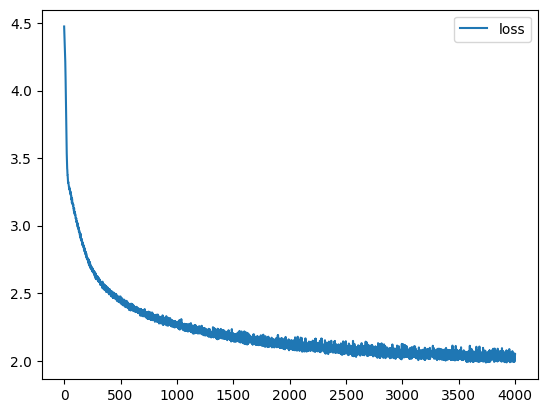

In [21]:
for i in range(4000):
    batch = torch.tensor(next(generate_chunk()))
    
    logits_seq = rnn_loop(rnn_cell, batch)
    
    predictions_logits = logits_seq[:, :-1]
    actual_next_tokens = batch[:, 1:]
    
    loss = loss_func(
        predictions_logits.reshape((-1, num_tokens)), 
        actual_next_tokens.reshape(-1)
    )
    loss.backward()
    opt.step()
    opt.zero_grad()
    
    history.append(loss.data.numpy())
    if (i+1)%100==0:
        clear_output(True)
        plt.plot(history,label='loss')
        plt.legend()
        plt.show()

assert np.mean(history[:10]) > np.mean(history[-10:]), "RNN didn't converge."

В качестве иллюстрации ниже доступен график значений функции потерь, построенный в ходе обучения авторской сети (сам код для ее обучения вам и предстоит написать).

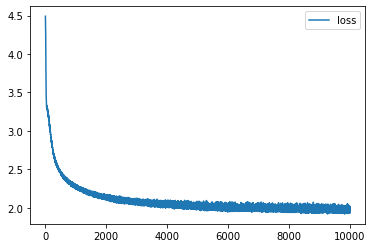

Шаблон функции `generate_sample` также доступен ниже. Вы можете как дозаполнить его, так и написать свою собственную функцию с нуля. Не забывайте, что все примеры в обучающей выборке начинались с токена `<sos>`.

In [24]:
x = torch.tensor([1, 2, 3])
print(x.size()[0])

3


In [36]:
import torch.nn.functional as F

In [93]:
def generate_sample(
    cell, seed_phrase=None, max_length=200, temperature=1.0, device=device
):
    """
    The function generates text given a phrase of length at least SEQ_LENGTH.
    :param seed_phrase: prefix characters. The RNN is asked to continue the phrase
    :param max_length: maximum output length, including seed_phrase
    :param temperature: coefficient for sampling.  higher temperature produces more chaotic outputs,
                        smaller temperature converges to the single most likely output
    """
    
#     print(len(seed_phrase))
    if seed_phrase is not None:
        x_sequence = [token_to_idx["<sos>"]] + [
            token_to_idx[token] for token in seed_phrase
        ]
    else:
        x_sequence = [token_to_idx["<sos>"]]

    x_sequence = torch.tensor([x_sequence], dtype=torch.int64).to(device)
#     print(f'initial x_seq shape: {x_sequence.shape}')
    
    hid_state = cell.initial_state(batch_size=1)
    for i in range(x_sequence.size()[0] - 1):
        logits, hid_state = cell(x_sequence[:, i].unsqueeze(0), hid_state)
    
#     print(x_sequence.size())
    for _ in range(max_length - x_sequence.size()[1] + 1):
        logits, hid_state = cell(x_sequence[:, -1].unsqueeze(0), hid_state)
#         print(logits.shape)
        p_next = F.softmax(logits / temperature, dim=-1).data.numpy()[0]
        
#         print(p_next.shape)
        next_ix = np.random.choice(len(tokens), p=p_next.reshape(-1))
#         print(tokens[next_ix])
        next_ix = torch.tensor([next_ix], dtype=torch.int64)
        
#         print(x_sequence.shape)
#         print(next_ix.shape)
        x_sequence = torch.cat([x_sequence.squeeze(0), next_ix]).unsqueeze(0)
        
    
    # feed the seed phrase, if any

    # your code here

    return "".join([tokens[ix] for ix in x_sequence.cpu().data.numpy()[0]])

Пример текста сгенерированного обученной моделью доступен ниже. Не страшно, что в тексте много несуществующих слов. Используемая модель очень проста: это простая классическая RNN.

In [91]:
model = rnn_cell

In [94]:
print(
    generate_sample(
        model, " мой дядя самых честных правил", max_length=500, temperature=0.8
    )
)

<sos> мой дядя самых честных правильбеть своей поэт,
човые еез
иечаят по своей
стулей.



xx

и не.


xxxv

там,
еще нам из писаки испезнии провою.
но красток у берне.
а татьу тон любу можду лищесть он в столи альак и и цвет не про подняласть спросте и всталу любви и устей, завравил.
и встрековять брасой не скупрява не времновол.



xix

и
и стелой,
ей
отомалый зласят,
и вздарил
добвало верина свездов, не тавил им пуро вири отремяна
не забома.
здесьмо шуму; мастили соровется бардом,
соне
и жизних дот


In [95]:
print(
    generate_sample(
        model, " мой дядя самых честных правил", max_length=500, temperature=0.5
    )
)

<sos> мой дядя самых честных правильбу собельной;
уван стором
в грук на в подами пора моей,
как согда простенный без моей
на врали вочела образурный
в правила онегин,
и мне полно долженным скучно жизни ожали нет?



xxxvii

в «ты, полчит стором на порама постором жали не то ж пора свое и сени страстре приважа на севой волковый в рука сость ленского в старался долго ль на сердце приважа страня сердце в ней даленье,
готорой,
на встренила сторобы,
и другом черела с мельбе его в него в страстный востоль,


In [97]:
sample = generate_sample(
        model, " мой дядя самых честных правил", max_length=500, temperature=0.5)
print(len(sample.replace('<sos>', '')))
print(sample.replace('<sos>', ''))

500
 мой дядя самых честных правильмоть словавный татьяна там, на тами и все скали в тревненный, кречный нада,
и вестей,
вот без хоть уедельной
и в она не время.
он страйместь посклянских не герок поравлил сость с ней моговать с семья, простоле страк и без вословец не пред их свет в тревнить горость раздали
и в то подвластре простенный забовало предарый правдой;
как судьми сторожда полонья
на пред встречала сость пестрых под слова,
когда состела оставит он он он он не скуманий,
местре наших мой верн


### Сдача задания
Сгенерируйте десять последовательностей длиной 500, используя строку ' мой дядя самых честных правил'. Температуру для генерации выберите самостоятельно на основании визуального качества генериуремого текста. Не забудьте удалить все технические токены в случае их наличия.

Сгенерированную последовательность сохрание в переменную `generated_phrase` и сдайте сгенерированный ниже файл в контест.

In [98]:
seed_phrase = " мой дядя самых честных правил"

In [ ]:
generated_phrases = # your code here

# For example:

# generated_phrases = [
#     generate_sample(
#         model,
#         ' мой дядя самых честных правил',
#         max_length=500,
#         temperature=1.
#     ).replace('<sos>', '')
#     for _ in range(10)
# ]

In [99]:
generated_phrases = [
    generate_sample(
        model,
        ' мой дядя самых честных правил',
        max_length=500,
        temperature=0.8
    ).replace('<sos>', '')
    for _ in range(10)
]

In [65]:
output = {key: ','.join([str(x) for x in list(data.item()[key])]) for key in 'train', 'test'}

SyntaxError: invalid syntax (<ipython-input-65-6250272304d5>, line 1)

In [100]:
# do not change the code in the block below
# __________start of block__________

if "generated_phrases" not in locals():
    raise ValueError("Please, save generated phrases to `generated_phrases` variable")

for phrase in generated_phrases:

    if not isinstance(phrase, str):
        raise ValueError("The generated phrase should be a string")

    if len(phrase) != 500:
        raise ValueError("The `generated_phrase` length should be equal to 500")

    assert all(
        [x in set(tokens) for x in set(list(phrase))]
    ), "Unknown tokens detected, check your submission!"


submission_dict = {"token_to_idx": token_to_idx, "generated_phrases": generated_phrases}

np.save("submission_dict_hw09.npy", submission_dict, allow_pickle=True)
print("File saved to `submission_dict_hw09.npy`")
# __________end of block__________

File saved to `submission_dict_hw09.npy`


На этом задание завершено. Поздравляем!